In [1]:
from pylab import *
import numpy as np
import warnings
import matplotlib.pyplot as plt
import scipy.integrate as quad
from scipy.stats import gamma
from scipy.optimize import curve_fit
warnings.filterwarnings('ignore')
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 20

$\displaystyle{\text{Classical expression of Hamiltonian of a system is }: \ \ H(q,p)=\frac{kq^2}{2}+\frac{p^2}{2m}}$

$\displaystyle{\begin{aligned}\text{Space coordinate }: q&=A\cos(\omega t+\phi), \\ \qquad\text{Momentum coordinate }: p&=m\dot{q}=-m\omega A \sin(\omega t+\phi), \\ \qquad &{A}\text{ being the amplitude and } \omega\text{ is the frequency of vibration}\\ \omega&=\sqrt{k/m}=>k=m\omega^2 \end{aligned}}$

$\displaystyle\begin{aligned}H(q,p) &=\frac{kq^2}{2}+\frac{p^2}{2m} \\ &= \frac{m\omega^2A^2\cos^2(\omega t+\phi)}{2}+\frac{m\omega^2 A^2 \sin^2(\omega t+\phi)}{2} \\ &=\frac{m\omega^2A^2}{2} \Big(\cos^2(\omega t+\phi)+\sin^2(\omega t+\phi)\Big) \\ &=\frac{m\omega^2A^2}{2} \\ &=E \end{aligned}$

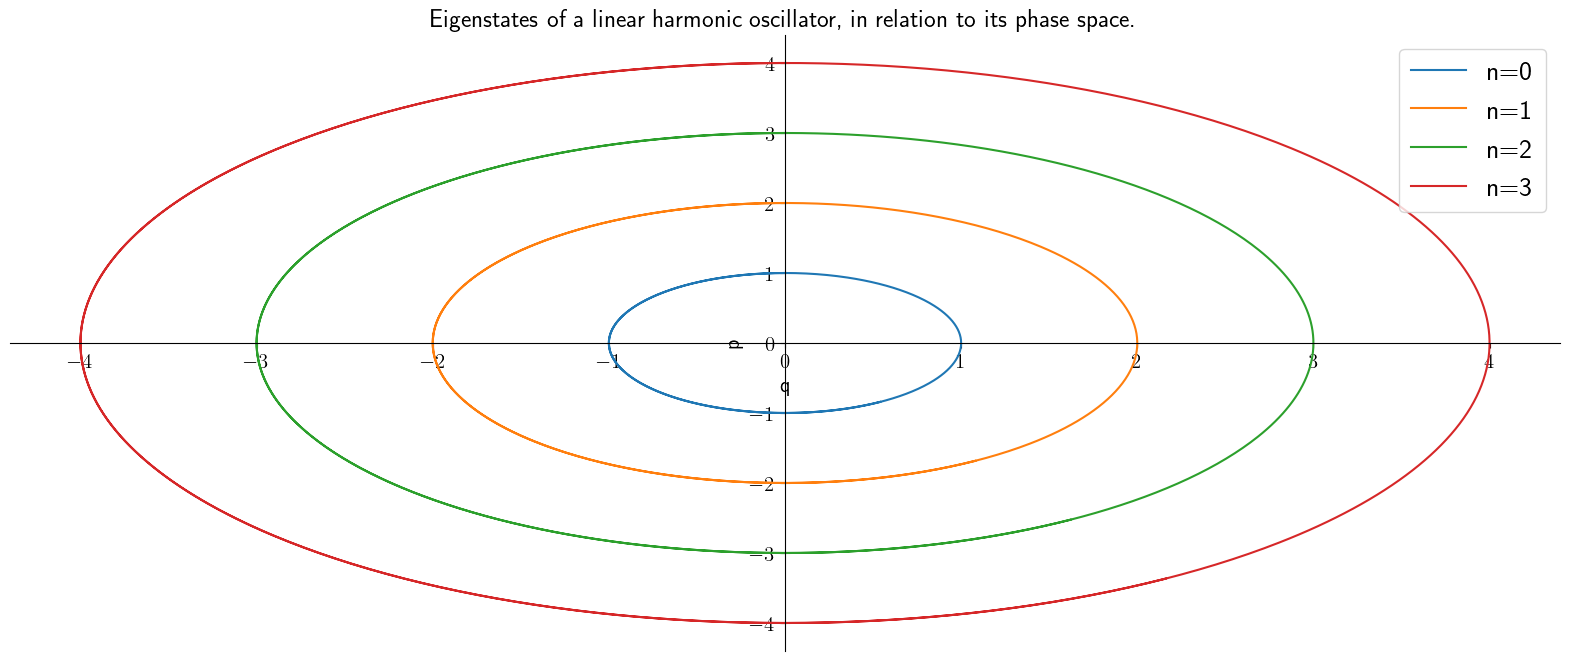

In [2]:
def q(t):
    return A*np.cos(w*t+phi)

def p(t):
    return -m*w*A*np.sin(w*t+phi)

k,m,phi=1,1,1
w=(k/m)**0.5
t=np.linspace(0,10,1000)
A= [ 1, 2 , 3, 4]
subplot(111)
for A in A:
    plt.plot(q(t),p(t),label='n=%i'%(A-1))
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
ax.set_xlabel('q')
ax.set_ylabel('p')
plt.legend(loc='upper right')
plt.title('Eigenstates of a linear harmonic oscillator, in relation to its phase space.')
plt.show()

In [3]:
def cosh(z):
    ez = np.exp(z)
    enz = np.exp(-z)
    return (ez + enz)/2 

def tanh(z):
    ez = np.exp(z)
    enz = np.exp(-z)
    return (ez - enz)/(ez + enz) 

def sech(z):
    ez = np.exp(z)
    enz = np.exp(-z)
    return 2/(ez + enz)

def coth(z):
    ez = np.exp(z)
    enz = np.exp(-z)
    return (ez + enz)/(ez - enz)

# Langevin function:$$L(x)=\coth x-\frac{1}{x}$$

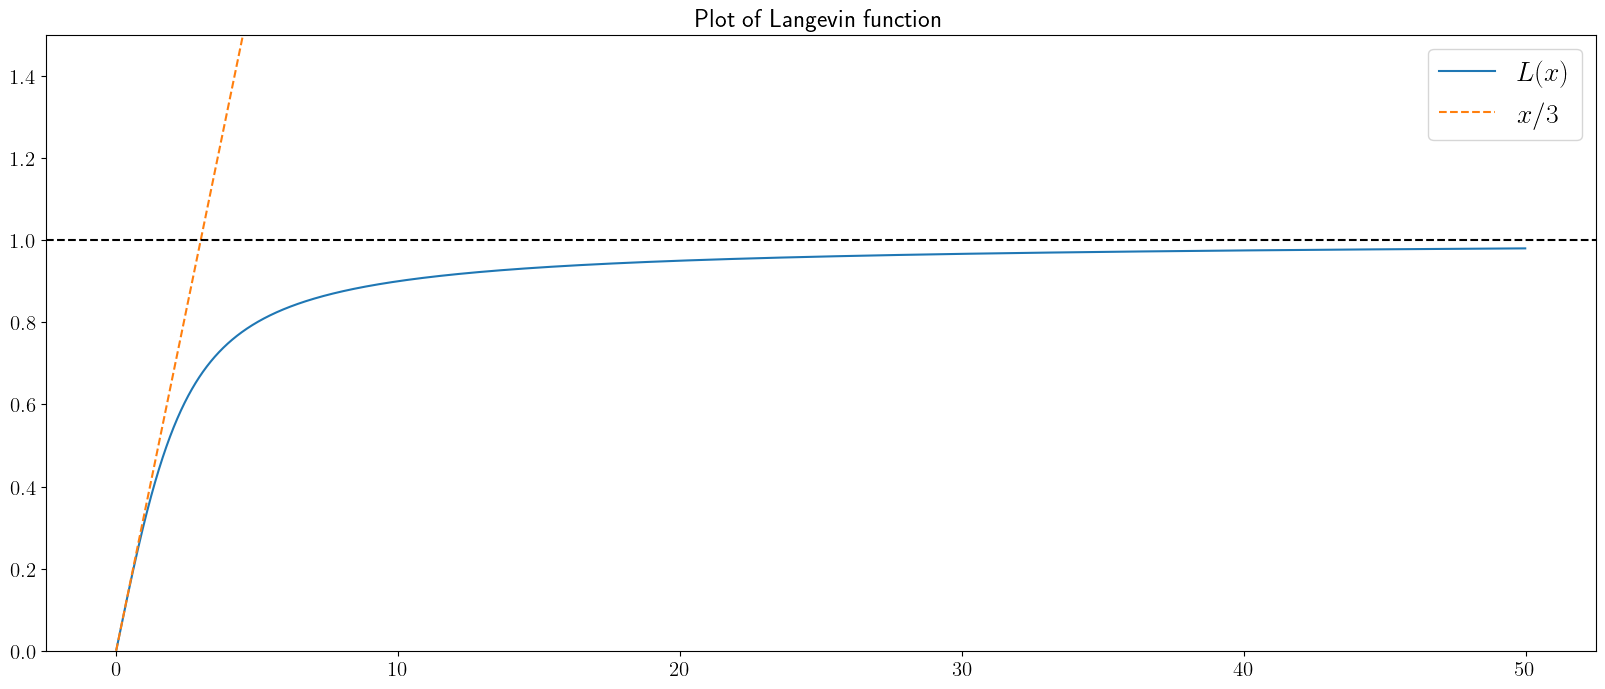

In [4]:
def Langevin(x):
    return coth(x)-(1/x)

x=np.arange(0,50,0.01)
plt.plot(x,Langevin(x),label=r'$L(x)$')
plt.plot(x,x/3,'--',label=r'$x/3$')
plt.legend()
plt.ylim(0,1.5)
plt.axhline(y=1.0, color="black", linestyle="--")
plt.title('Plot of Langevin function')
plt.show()

# Brillouin function $\displaystyle{B_J(x)}$ of order $J$: $$\displaystyle{B_J(x)=\Big(1+\frac{1}{2J}\Big)\coth\Big\{\Big(1+\frac{1}{2J}\Big)x\Big\}-\frac{1}{2J}\coth\Big\{\frac{1}{2J}x\Big\}}$$

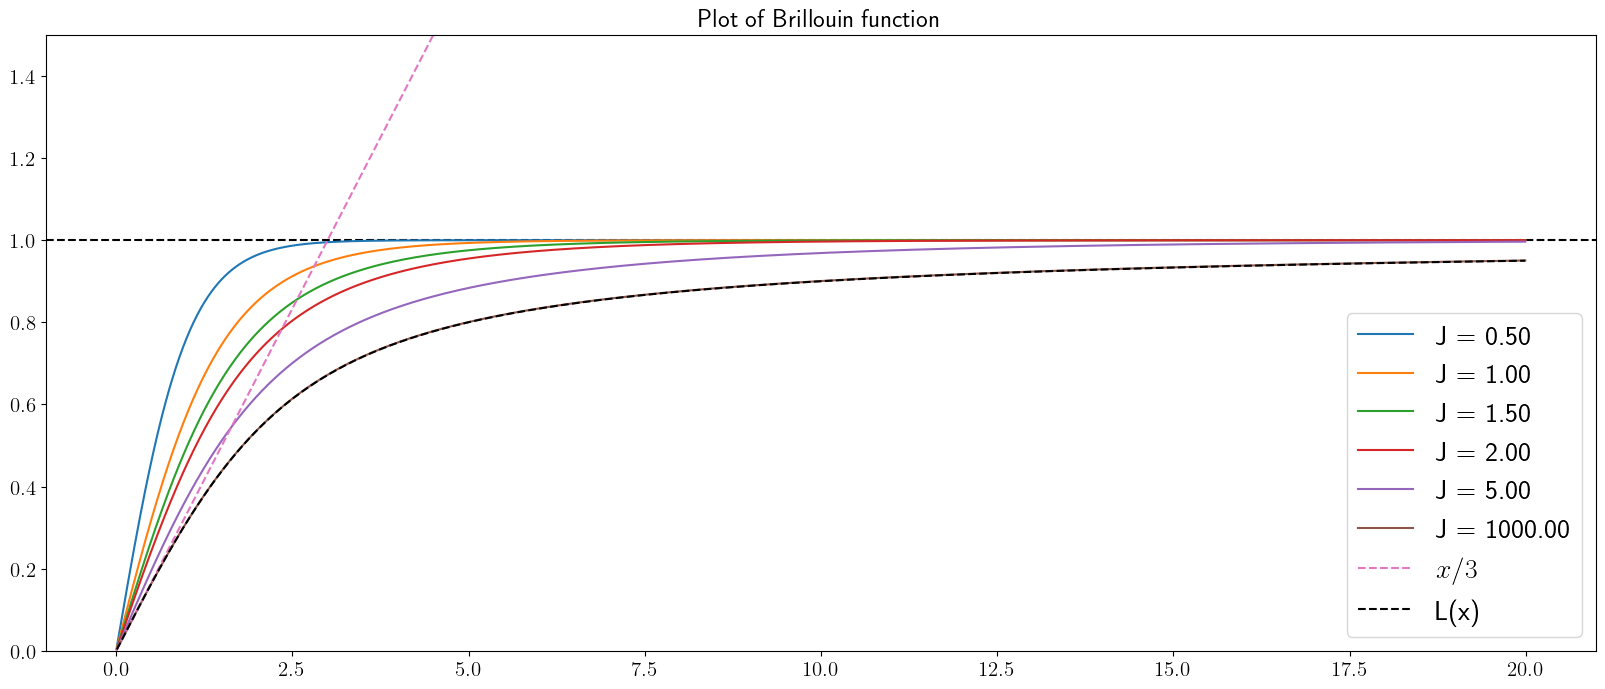

In [5]:
def Brillouin(J,x):
    return (1+(1/(2*J)))*coth((1+(1/(2*J)))*x)-(1/(2*J))*coth((1/(2*J))*x)

x=np.arange(0,20,0.01)
J1=[1/2, 1, 3/2, 2, 5, 1000]

plt.axhline(y=1.0, color="black", linestyle="--")

for J in J1:
    plt.plot(x,Brillouin(J,x), label=' J = %0.2f'%J)
plt.plot(x,x/3,'--',label=r'$x/3$')  
plt.plot(x,Langevin(x),'k--',label='L(x)')
plt.legend()    
plt.ylim(0,1.5)
plt.title('Plot of Brillouin function')
plt.show()

From the graphical view we can conclude that as $J \rightarrow\infty \qquad B_J(x)\rightarrow L(x)$ 

### $$\displaystyle{\textbf{Thermodynamics of a magnetic systems in negative temperatures}}$$

Consider a system of dipoles with spins $J=\frac{1}{2}$ and no. of possible orientation $g=2$ .                             
It has two orientations, the corresponding energies being $\displaystyle{-\mu_o\mu_BH}$ and $\displaystyle{+\mu_o\mu_BH}$;                               
let us call these energies $-\epsilon$ and $+\epsilon$ ; $\displaystyle{i.e. \ \  \epsilon=\mu_o\mu_BH \qquad \beta=\frac{1}{kT}}$.

$$\displaystyle{\text{Partition function of the system,} Q_N(\beta)=(e^{\beta\epsilon}+e^{-\beta\epsilon})^N=\{ 2\cosh(\beta\epsilon)  \}^N  \qquad\qquad\qquad\quad-(1}$$

$$\displaystyle{\text{Helmholtz free energy, }  A=-kT\ln Q_N(\beta)=-NkT\ln\Big\{2\cosh\big(\frac{\epsilon}{kT}\big)\Big\},\qquad\qquad\qquad-(2}      $$
from which                                                                                              
 $$\displaystyle{\text{Entropy, }S=-\Big(\frac{\partial A}{\partial T}\Big)_H= Nk\Big[\ln\Big\{2\cosh\big(\frac{\epsilon}{kT}\big)\Big\}-\frac{\epsilon}{kT}\tanh\big(\frac{\epsilon}{kT}\big)\Big]\qquad\qquad\qquad \ -(3  }$$
 
 $$\displaystyle{\text{Internal Energy, }U=A+TS=-N\epsilon\tanh\big(\frac{\epsilon}{kT}\big)\qquad\qquad\qquad\qquad\qquad\qquad\qquad-(4    }$$
 
 $$\displaystyle{\text{Magnetization, }M=\frac{1}{\mu_o}\Big(\frac{\partial A}{\partial H}\Big)_T = N\mu_B \tanh \big(\frac{\epsilon}{kT}\big)\qquad\qquad\qquad \qquad \qquad\quad\qquad-(5}$$
 
 $$\displaystyle{\text{Specific heat of the system, } C=\Big(\frac{\partial U}{\partial T}\Big)_H=Nk\big(\frac{\epsilon}{kT}\big)^2  \text{sech}^2\big(\frac{\epsilon}{kT}\big)\qquad\qquad\qquad\quad \ -(6}$$
 
 So let us consider $\displaystyle{x=\frac{kT}{\epsilon}}$, so then
 $$\displaystyle{\frac{S}{Nk}= \ln\Big\{2\cosh\big(\frac{1}{x}\big)\Big\}-\frac{\tanh\big(\frac{1}{x}\big)}{x}}$$
 
 $$\displaystyle{\frac{U}{N\epsilon}=-\tanh\big(\frac{1}{x}\big)}$$
 
 $$\displaystyle{\frac{M}{N\mu_B}=  \tanh \big(\frac{1}{x}\big)}$$
 
 $$\displaystyle{\frac{C}{Nk}=\Big(\frac{\text{sech}\big(\frac{1}{x}\big)}{x}\Big)^2}$$

In [6]:
plt.rcParams["figure.figsize"] = (20,16)

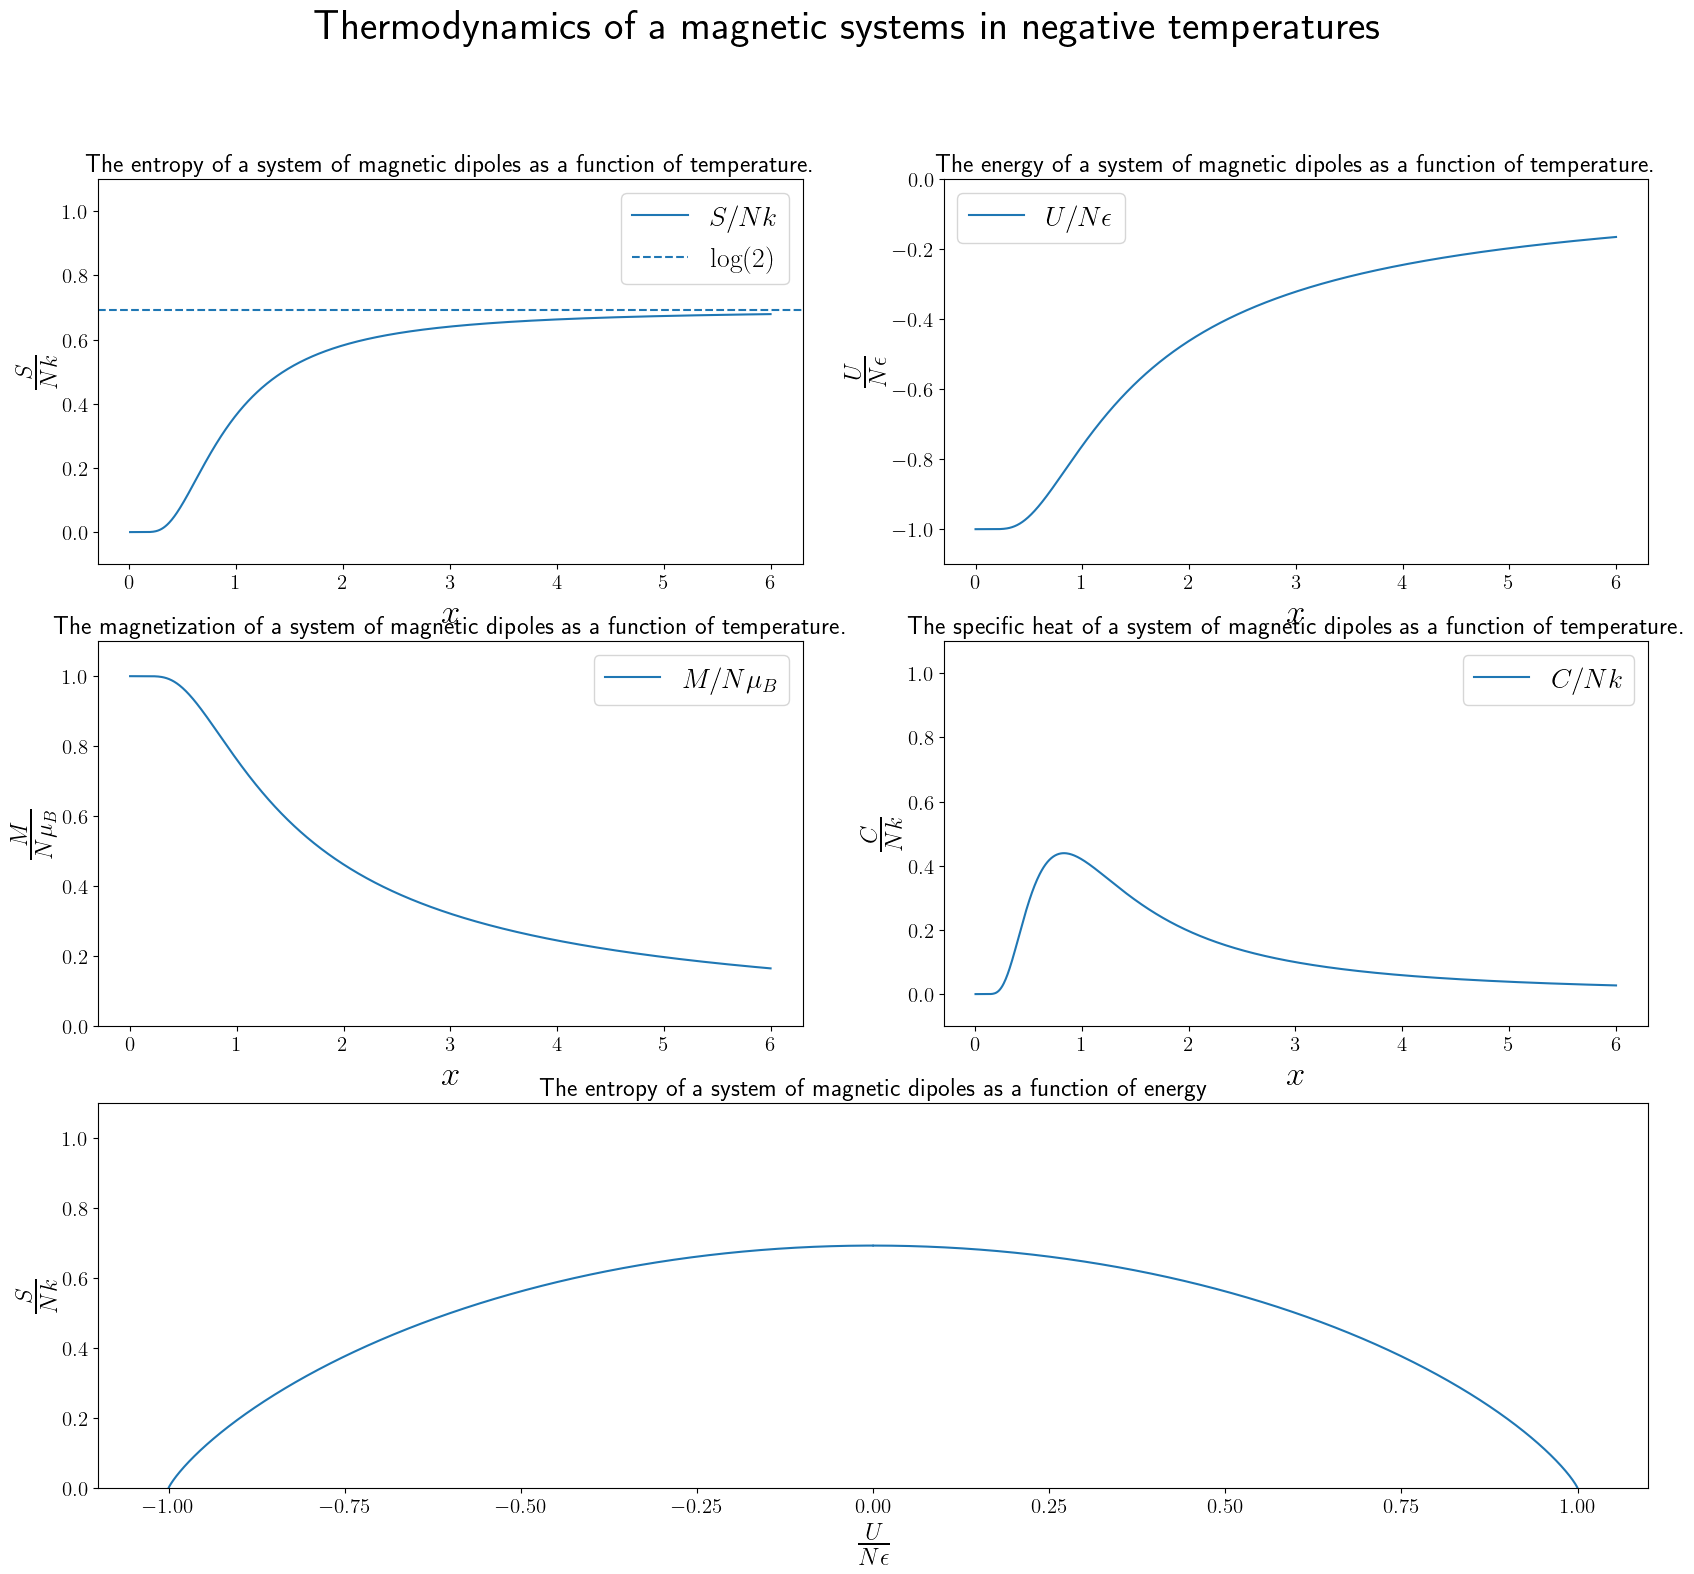

In [7]:
x=np.linspace(0,6,1000)

def S_Nk(x):
    return np.log(2*cosh(1/x))-(1/x)*tanh(1/x)

def U_NE(x):
    return -np.tanh(1/x)

def M_Nu(x):
    return np.tanh(1/x)

def C_Nk(x):
    return ((np.tanh(1/x)/np.sinh(1/x))/x)**2


fig = plt.figure(figsize = (20, 17))
gs=fig.add_gridspec(3,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,:])

ax1.plot(x, S_Nk(x), label=r'$S/Nk$')
ax1.axhline(np.log(2),linestyle='--', label=r'$\log (2)$')
ax1.set_title('The entropy of a system of magnetic dipoles as a function of temperature.')
ax1.set_ylabel(r'$\frac{S}{Nk}$', fontsize=25)
ax1.set_xlabel(r'$x$', fontsize=25)
ax1.set_ylim(-0.1,1.1)
ax1.legend()

ax2.plot(x, U_NE(x),  label=r'$U/N \epsilon$')
ax2.set_title('The energy of a system of magnetic dipoles as a function of temperature.')
ax2.set_ylabel(r'$\frac{U}{N\epsilon}$', fontsize=25)
ax2.set_xlabel(r'$x$', fontsize=25)
ax2.set_ylim(-1.1,0)
ax2.legend()

ax3.plot(x, M_Nu(x), label=r'$M/N \mu_B$')
ax3.set_title('The magnetization of a system of magnetic dipoles as a function of temperature.')
ax3.set_ylabel(r'$\frac{M}{N\mu_B}$', fontsize=25)
ax3.set_xlabel(r'$x$', fontsize=25)
ax3.set_ylim(0,1.1)
ax3.legend()

ax4.plot(x, C_Nk(x),  label=r'$C/Nk$')
ax4.set_title('The specific heat of a system of magnetic dipoles  as a function of temperature.')
ax4.set_ylabel(r'$\frac{C}{Nk}$', fontsize=25)
ax4.set_xlabel(r'$x$', fontsize=25)
ax4.set_ylim(-0.1,1.1)
ax4.legend()

x=np.linspace(-1001,1001,1000001)
ax5.plot(U_NE(x),S_Nk(x))
ax5.set_title('The entropy of a system of magnetic dipoles as a function of energy')
ax5.set_xlabel(r'$\frac{U}{N\epsilon}$', fontsize=25)
ax5.set_ylabel(r'$\frac{S}{Nk}$', fontsize=25)
ax5.set_ylim(0,1.1)
ax5.set_xlim(-1.1,1.1)

plt.suptitle('Thermodynamics of a magnetic systems in negative temperatures', fontsize=30)
plt.show()

---

##  Equilibrium of the Einstein crystal

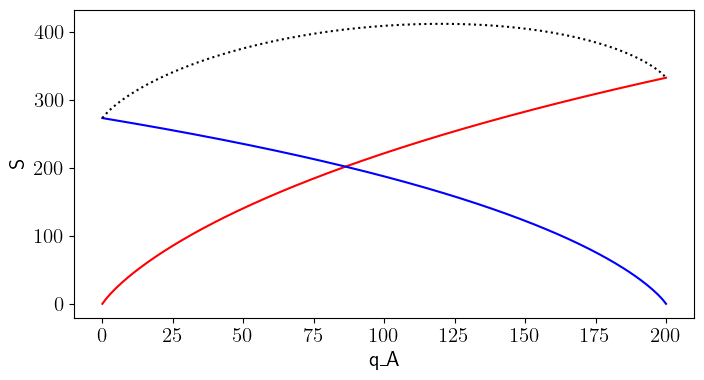

In [15]:
from scipy.special import comb 

NA = 300
NB = 200
q = 200
multA = np.zeros(q+1,float)
multB = np.zeros(q+1,float)
mult = np.zeros(q+1,float)
N = NA + NB
qvalue = np.array(range(q+1))
for ik in range(len(qvalue)):
    qA = qvalue[ik]
    qB = q - qA
    multA[ik] = comb(qA+NA-1,qA)
    multB[ik] = comb(qB+NB-1,qB)
    mult[ik] = multA[ik]*multB[ik]
SA = np.log(multA)
SB = np.log(multB)
STOT = SA + SB

plt.figure(figsize=(8,4))
plt.plot(qvalue,SA,'-r',qvalue,SB,'-b',qvalue,STOT,':k')
plt.xlabel('q_A')
plt.ylabel('S')
plt.show()

## E

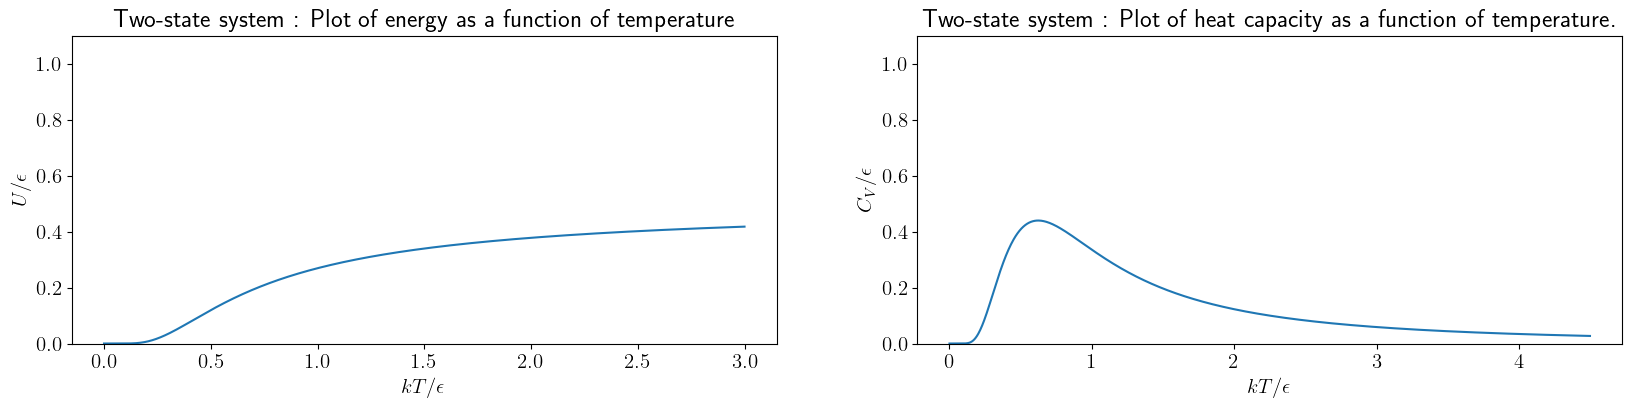

In [16]:
x = np.linspace(0,3,1000)
E = np.exp(-1/x)/(1+np.exp(-1/x))

plt.figure(figsize=(20,4))

plt.subplot(121)
plt.plot(x,E)
plt.title('Two-state system : Plot of energy as a function of temperature')
plt.xlabel(r'$kT/\epsilon$')
plt.ylabel(r'$U/\epsilon$')
plt.ylim(0,1.1)

CV = np.diff(E)/np.diff(x)
xmid = 0.5*(x[1:])+x[0:-1]
plt.subplot(122)
plt.plot(xmid,CV)
plt.title('Two-state system : Plot of heat capacity as a function of temperature.')
plt.xlabel(r'$kT/\epsilon$')
plt.ylabel(r'$C_V/\epsilon$')
plt.ylim(0,1.1)
plt.show()

## $\displaystyle{\text{Density of states }:D(\epsilon)= \frac{8\pi V}{h^3}(2m^3\epsilon)^{1/2}}$

Text(0.5, 1.0, 'Density of states')

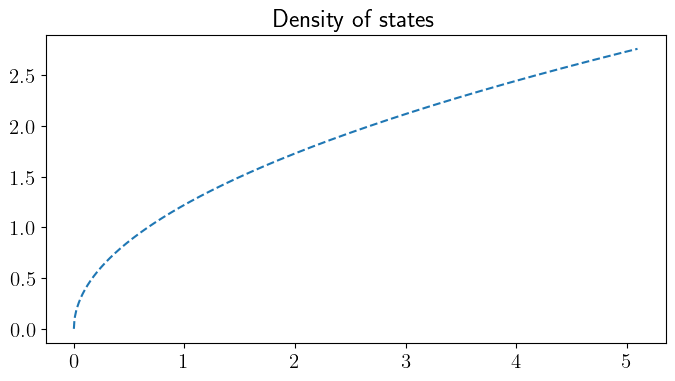

In [17]:
def D(E):
    return 8*np.pi*V*(2*m**3*E)**0.5/h**3

h = 6.626e-34              # Plank's const
m,V=1e-34,1e-50
E = np.arange(0, 5.1, 0.005)

plt.figure(figsize=(8,4))
plt.plot( E, D(E), '--')
plt.title('Density of states')

In [18]:
h = 6.626e-34              # Plank's const
c = 3.0e+8                 # speed of light
k = 1.38e-23               # Boltzmann constant (joule per kelvin)
e = 1.6e-19                # charge of electron
E = 0.01

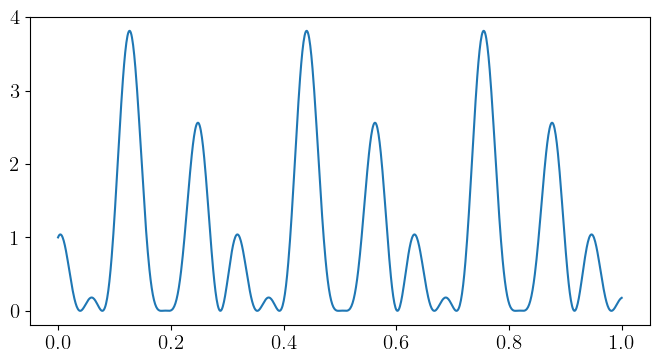

In [19]:
from sympy import *
u = symbols('u')
f = (sin(10*u)+cos(50*u))**2
g=integrate(f)
fint = float(g.subs(u,1))
# Convert to Python function
fun = lambdify(u,f,"numpy")

# Plot f(x)
xx = np.linspace(0,1,1000)
yy = fun(xx)
plt.figure(figsize=(8,4))
plt.plot(xx,yy)

Text(0, 0.5, 'I')

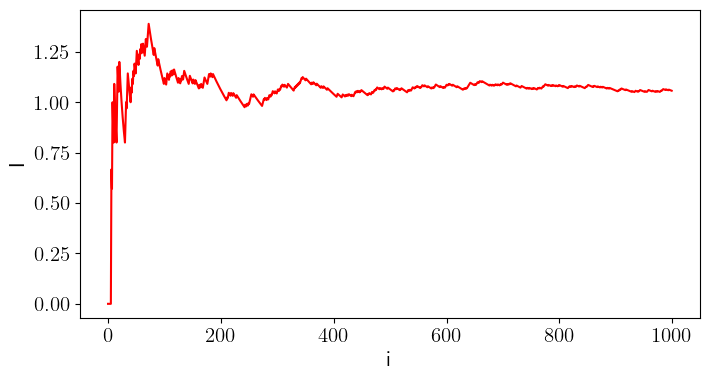

In [20]:
fmax = 4.0 # Upper limit of f(x) for x (0,1)
N = 1000
hit = 0.
intest = np.zeros((N,1),float)
for i in range(1,N):
    x = rand(1); y = rand(1)*fmax
    if (y<fun(x)):
        hit = hit + 1
    intest[i] = hit/i*fmax

plt.figure(figsize=(8,4))
plt.plot(np.array(range(0,N)),intest,'-r')
plt.xlabel('i')
plt.ylabel('I')

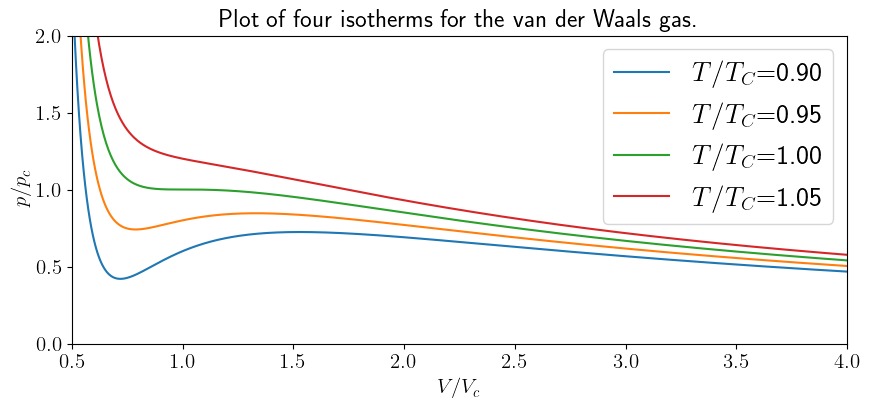

In [21]:
That = [0.9,0.95,1.0,1.05]
V = np.linspace(0.5,4.0,1000)
plt.figure(figsize=(10,4))

for i in range(len(That)):
    T = That[i]
    p = 8.0/3.0*T/(V-1/3)-3.0/(V**2)
    plt.plot(V,p,label=r'$T/T_C$=%0.2f'%T)
plt.xlabel(r'$V/V_c$')
plt.ylabel(r'$p/p_c$')
plt.ylim(0,2)
plt.xlim(0.5,4)
plt.legend()
plt.title('Plot of four isotherms for the van der Waals gas.')
plt.show()

# $\varphi=\varphi_0[(\frac{r_o}{r})^{12} - 2(\frac{r_o}{r})^6]$

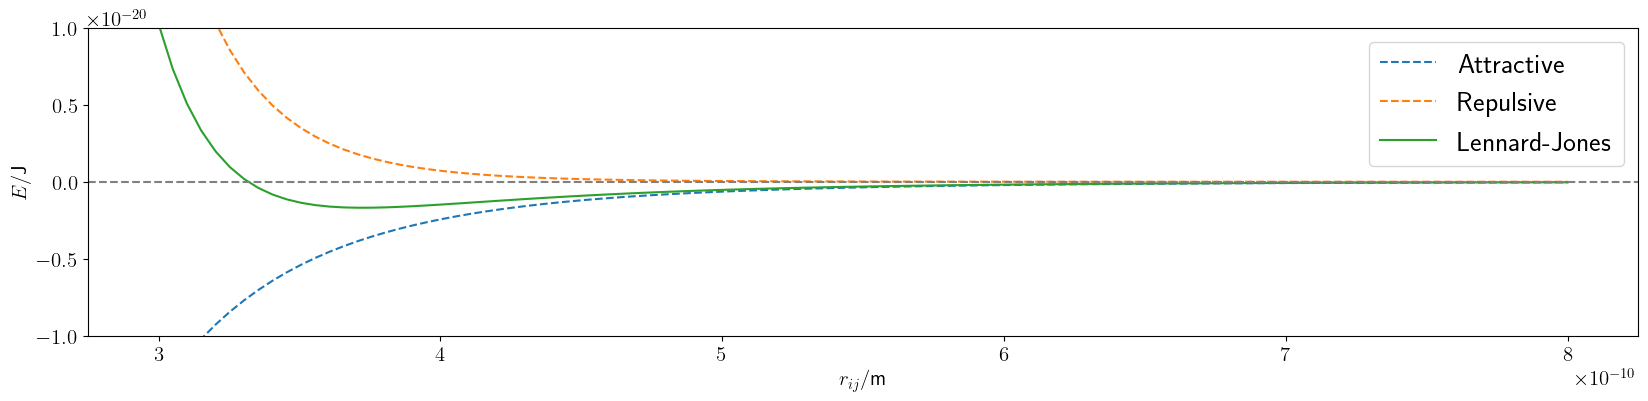

In [22]:
def attractive(dr, b):
    return  -b /dr**6

def repulsive(dr, a):
    return  a /dr**12

def lj(dr, constants):
    return (repulsive(dr, constants[0]) + attractive(dr, constants[1]))

E=8.854187817e-12
r = np.linspace(3e-10, 8e-10, 100)
plt.figure(figsize=(20,4))

plt.plot(r, attractive(r, 10.e-78),'--', label='Attractive')
plt.plot(r, repulsive(r, 1.2e-134),'--', label='Repulsive')
plt.plot(r, lj(r, [1.2e-134, 9.e-78]), label='Lennard-Jones')
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel(r'$r_{ij}$/m')
plt.ylabel(r'$E$/J')
plt.ylim(-1e-20,1e-20)
plt.legend()
plt.show()

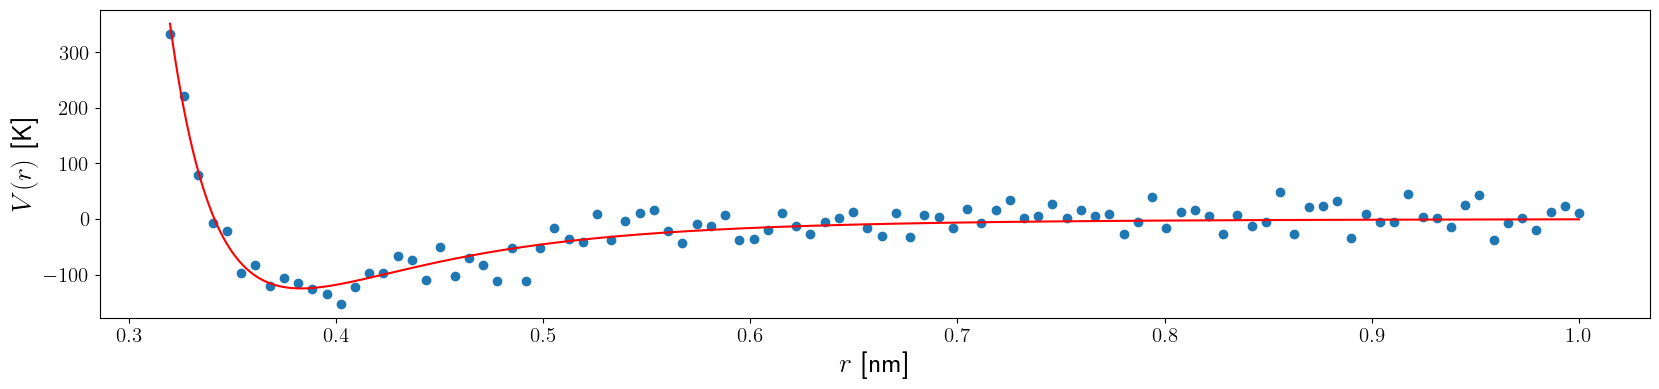

In [23]:
r_data, V_data = np.loadtxt('../youtube_channel-main/Data/curvefite2.txt')
r_data*=1e9
V_data/=1.38e-23

def model_f(r, sigma, epsilon):
    return 4*epsilon*((sigma/r)**12-(sigma/r)**6)
# Obtain initial guesses
eps_init_guess = 120
sig_init_guess = 2**(-1/6) * 0.4
#Get the optimal parameters
popt, pcov = curve_fit(model_f, r_data, V_data, p0=[sig_init_guess,
                                                    eps_init_guess])
sig_opt, eps_opt = popt
#Lets plot data next to model

r_model = np.linspace(min(r_data), max(r_data), 1000)
V_model = model_f(r_model, sig_opt, eps_opt)
plt.figure(figsize=(20,4))

plt.scatter(r_data, V_data)
plt.plot(r_model, V_model, color='r')
plt.xlabel('$r$ [nm]', fontsize=20)
plt.ylabel('$V(r)$ [K]', fontsize=20)
plt.show()

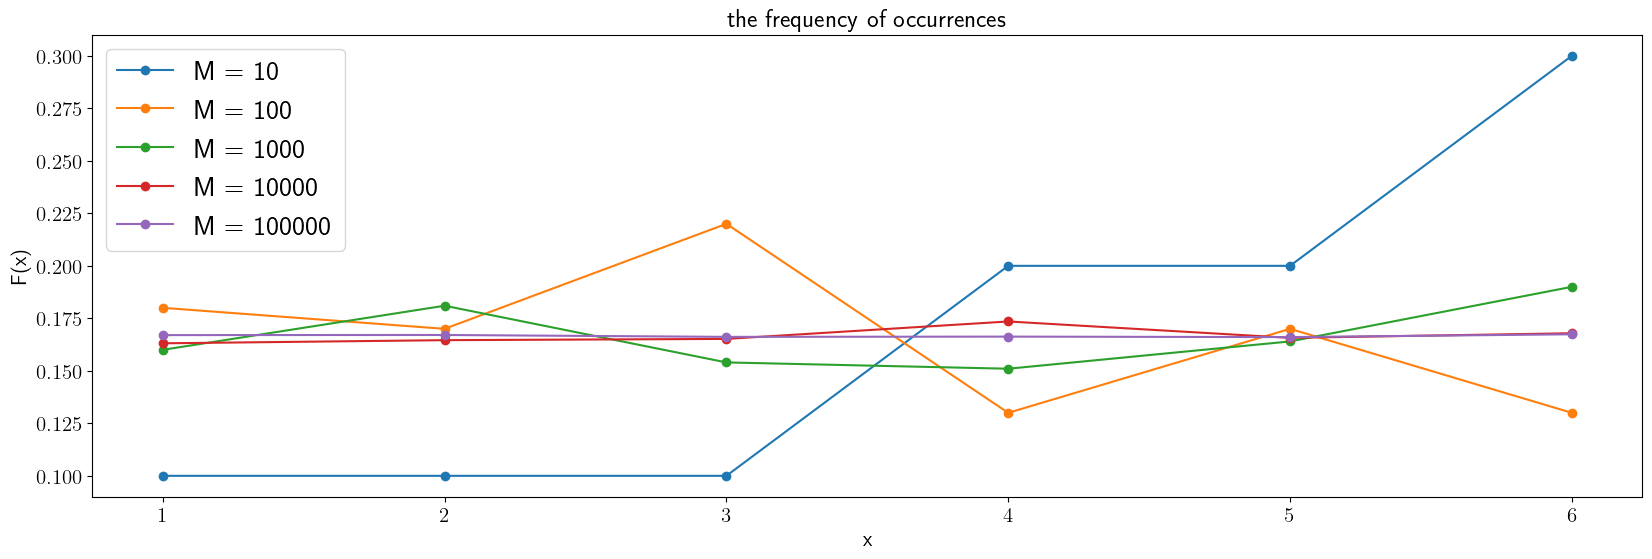

In [24]:
Mval = array([10,100,1000,10000,100000])
nM = len(Mval)
plt.figure(figsize=(20,6))

for im in range(nM):
    M = Mval[im]
    m = np.random.randint(0,6,M)+1
    [Nx,edges] = histogram(m,6,range=(0.5,6.5))
    Fx = Nx/M
    x = (edges[1:]+edges[:-1])/2
    plt.plot(x,Fx,'-o',label='M = %i'%M)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('the frequency of occurrences')
plt.legend()
plt.show()

$\displaystyle{ g_p(Z)=\int_0^\infty\frac{x^{p-1}}{Z^{-1}\exp(x)-1}}$

$\displaystyle{ f_p(Z)=\int_0^\infty\frac{x^{p-1}}{Z^{-1}\exp(x)+1}}$

In [25]:
from scipy.integrate import quad
from scipy.special import gamma

def g(p, Z):
    I = quad(lambda x: x**(p-1)/(Z**(-1)*np.exp(x)-1), 0, np.inf, limit=200)[0]
    return I / gamma(p)

def f(p, Z):
    I = quad(lambda x: x**(p-1)/(Z**(-1)*np.exp(x)+1), 0, np.inf, limit=200)[0]
    return I / gamma(p)

Z = 1
p = 5/2
G = g(p, Z)
F = f(p, Z)

print('G =', G, '\nF =', F)

G = 1.341487257250918 
F = 0.8671998890110723


$ \displaystyle{\lambda = \sqrt{\frac{2\pi\hbar^2}{mk_B T}}}$

In [26]:
def lam(T):
    hb = 1.05457182 * 1e-34
    k_B = 1.380649*1e-23 
    m = 1
    return (2*np.pi*hb**2)/(m*k_B*T)

$\displaystyle{\frac{V}{\lambda^3_{T_C}}g_{\frac{3}{2}}(1)=N}$

$\displaystyle{\frac{V}{\lambda^3_{T}}g_{\frac{3}{2}}(1)=N_T<N.}$

$\displaystyle{\frac{\lambda^3_{T}}{\lambda^3_{T_C}}=\frac{N}{N_T}}$

$\displaystyle{N_0=N-N_T=N\bigg[1-\bigg(\frac{T}{T_C}\bigg)^{\frac{3}{2}}\bigg]}$

$\displaystyle{\frac{N_0}{N}=1-\bigg(\frac{T}{T_C}\bigg)^{\frac{3}{2}}}$

$\displaystyle{\frac{C_V}{Nk_B}=\frac{15}{4} \frac{g_{\frac{5}{2}}(z)}{g_{\frac{3}{2}}(z)} - \frac{9}{4}\frac{g_{\frac{3}{2}}(z)}{g_{\frac{1}{2}}(z)}}$

$\displaystyle{\frac{g_{3/2}(z)}{g_{3/2}(1)}=\bigg(\frac{T_C}{T}\bigg)^{3/2}<1.}$

In [27]:
m_He = 6.65*1e-24 # g
V = 27.6 # cc/mole
Tc = 3.13 # k
T = np.linspace(1.2, Tc, 100)


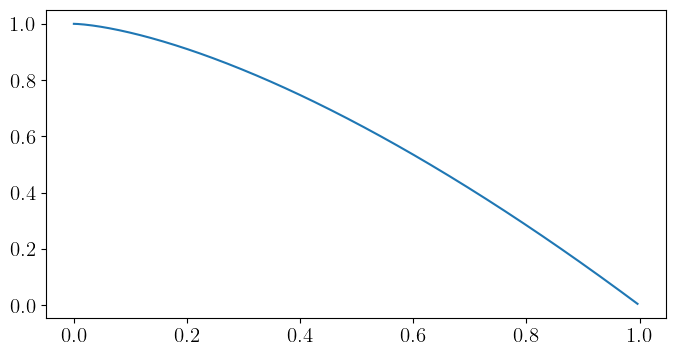

In [28]:
Tc=273

T = np.arange(0,273)
T_Tc=T/Tc
No_N=1-(T_Tc)**(3/2)
plt.figure(figsize=(8,4))
plt.plot(T_Tc, No_N)